<a href="https://colab.research.google.com/github/solankinitin1210/hotel-booking-analysis/blob/main/Capstone_Project_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.Problem Statment**

<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

<b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

<b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **2. Import required libraries and get data for analysis**

In [27]:
# Import Iibraries
import pandas as pd
import numpy as np
from datetime import date
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Mount drive and get Data
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Almabetter/Hotel Bookings.csv'
df=pd.read_csv(path)

Mounted at /content/drive


# **3. Review the data and analyse all columns**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **4. Adding Reqired column for analysis**

In [ ]:
#Add a month Number column
month = {'January':1,'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

df['month_no']=0
for index,row in df.iterrows():
  df.loc[index,'month_no']=month[row['arrival_date_month']]

In [ ]:
#Add Arival Date Column
df['dateInt']=df['arrival_date_year'].astype(str) + df['month_no'].astype(str).str.zfill(2)+ df['arrival_date_day_of_month'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')

In [ ]:
df['month']= datetime.datetime.strptime(df['arrival_date_month'],"%B")

In [ ]:
#Add Month-year Column
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')


# **5. Hotel type wise Booking Analysis by**

In [ ]:
#Get the table which display hotel type wise data for each year
hotel_type_wise_analysis=df.groupby(['arrival_date_year','hotel'])['meal'].count().unstack()
hotel_type_wise_analysis

x,y=hotel_type_wise_analysis['']

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,13682,8314
2016,38140,18567
2017,27508,13179


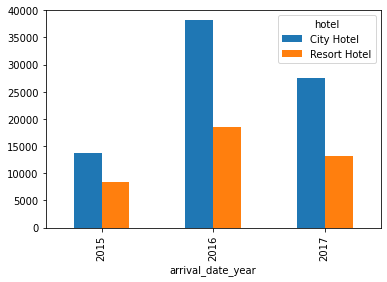

In [ ]:
#Plot the analysis
hotel_type_wise_analysis.plot.bar()


**Conclusion :**
City Hotel type have more booking compare to resort hotel type

# **6. Market segment wise Booking analysis**

In [ ]:
##Get the table which display market segment wise data and that way we'll find out which from market sagment received highest booking
market_sagment_analysis=df.groupby('market_segment')['hotel'].count().reset_index().sort_values(by='hotel',ascending=False)
market_sagment_analysis['percentage']=(market_sagment_analysis['hotel']/market_sagment_analysis['hotel'].sum())*100
market_sagment_analysis

,market_segment,hotel,percentage
6,Online TA,56477,47.304632
5,Offline TA/TO,24219,20.285619
4,Groups,19811,16.593517
3,Direct,12606,10.558673
2,Corporate,5295,4.435045
1,Complementary,743,0.622330
0,Aviation,237,0.198509
7,Undefined,2,0.001675


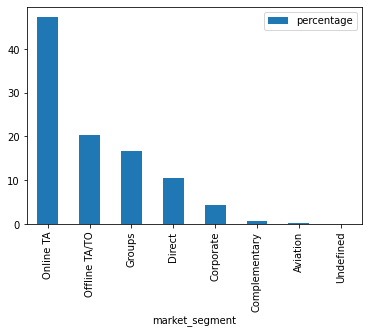

In [ ]:
#Plot the analysis
market_sagment_analysis.plot.bar(x='market_segment',y='percentage')

**Consclusion**
Highest number of booking received through online travel agents

# **7.Distribution channel wise booking analysis**

In [ ]:
##Get the table which display distribution channel wise data and that way we'll find out which from market sagment received highest booking
Distribution_chanel_analysis=df.groupby('distribution_channel')['hotel'].count().reset_index().sort_values(by='hotel',ascending=False)
Distribution_chanel_analysis['percentage']=(Distribution_chanel_analysis['hotel']/(Distribution_chanel_analysis['hotel'].sum()))*100
Distribution_chanel_analysis

,distribution_channel,hotel,percentage
3,TA/TO,97870,81.975040
1,Direct,14645,12.266521
0,Corporate,6677,5.592596
2,GDS,193,0.161655
4,Undefined,5,0.004188


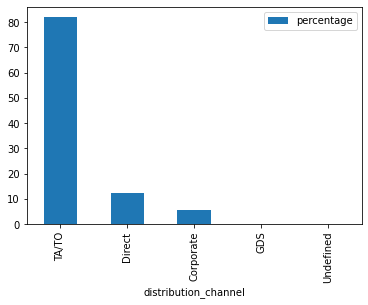

In [ ]:
#Plot the analysis
Distribution_chanel_analysis.plot.bar(x='distribution_channel',y='percentage')

**Conclusion :**
More than 80 of the booking received through tours and travels agents

# **8.Month wise booking analysis**

In [ ]:
##Get the table which display month wise data and that way we'll find which month was the busiest month
month_wise=df.groupby(['month_year','hotel'])['meal'].count().unstack() #.reset_index().sort_values(by='meal',ascending=True)
month_wise

hotel,City Hotel,Resort Hotel
month_year,,
2015-07,1398,1378
2015-08,2480,1409
2015-09,3529,1585
2015-10,3386,1571
2015-11,1235,1105
2015-12,1654,1266
2016-01,1364,884
2016-02,2371,1520
2016-03,3046,1778


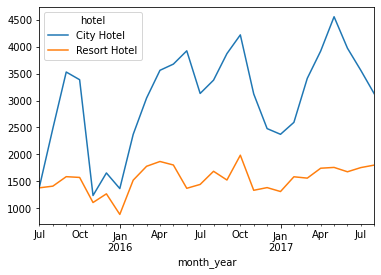

In [ ]:
# Plot the above table and see what we get
month_wise.plot()

**Conclusion:**
Highest booking occur in month of apr-jul and oct-nov


# **9.Country wise booking analysis**

In [ ]:
##Get the table which display contry wise data and that way we'll find which country's guest made highest booking
country_wise=df.groupby('country')['hotel'].count().reset_index().sort_values(by='hotel',ascending=False)
country_wise['percentage']=(country_wise['hotel']/country_wise['hotel'].sum())*100
country_wise.head(10)

,country,hotel,percentage
135,PRT,48590,40.865587
59,GBR,12129,10.200838
56,FRA,10415,8.759314
51,ESP,8568,7.205934
43,DEU,7287,6.128576
81,ITA,3766,3.167314
76,IRL,3375,2.838472
15,BEL,2342,1.969689
25,BRA,2224,1.870448
123,NLD,2104,1.769524


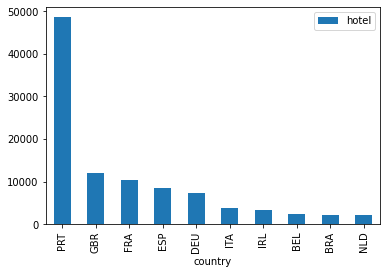

In [ ]:
country_wise.head(10).plot.bar(x='country',y='hotel')



```
# This is formatted as code
```

# Cancellation and more (work in progress)

In [ ]:
df.groupby(['hotel'])[df['reservation_status'] =='Canceled'].count()

In [ ]:
df[df['reservation_status'] =='Canceled'].count()

In [18]:
df[df['children'].isnull()]=0
df['total_guest']=(df['adults']+df['children']+df['babies']).astype(int)

In [22]:
guest_wise=df.groupby('total_guest')['hotel'].count().reset_index().sort_values(by='hotel',ascending=False)

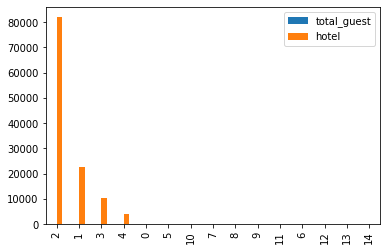

In [23]:
guest_wise.plot.bar()

In [24]:
sub_df = df.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)